In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression 

In [3]:
AllData=pd.read_csv('data 2001-2020.csv')

In [4]:
AllData.columns

Index(['QV2M', 'PRECTOTCORR', 'PS', 'WS50M', 'T2M', 'TS', 'ALLSKY_SFC_SW_DWN',
       'WS10M', 'ALLSKY_SFC_UV_INDEX', 'CLRSKY_SFC_PAR_TOT',
       'ALLSKY_SFC_PAR_TOT', 'WS2M'],
      dtype='object')

In [5]:
AllData[0:5]

,QV2M,PRECTOTCORR,PS,WS50M,T2M,TS,ALLSKY_SFC_SW_DWN,WS10M,ALLSKY_SFC_UV_INDEX,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_PAR_TOT,WS2M
0,4.82,0.00,101.08,5.07,8.90,8.46,2.81,3.44,0.33,49.52,47.77,2.10
1,4.64,0.00,101.49,6.00,8.90,8.76,3.04,4.12,0.40,53.49,52.51,2.55
2,4.70,0.00,101.68,3.93,9.30,8.41,3.08,2.76,0.40,54.26,53.34,1.74
3,4.70,0.00,101.23,4.09,10.09,8.55,3.08,2.94,0.41,54.72,53.71,1.86
4,4.52,0.01,100.89,3.13,10.48,8.16,3.09,2.27,0.41,54.09,53.38,1.45


In [6]:
AllData.isnull().any()

QV2M                   False
PRECTOTCORR            False
PS                     False
WS50M                  False
T2M                    False
TS                     False
ALLSKY_SFC_SW_DWN      False
WS10M                  False
ALLSKY_SFC_UV_INDEX    False
CLRSKY_SFC_PAR_TOT     False
ALLSKY_SFC_PAR_TOT     False
WS2M                   False
dtype: bool

In [7]:
AllData['WS2M'].describe()

count    7305.000000
mean        2.234271
std         0.757073
min         0.520000
25%         1.700000
50%         2.140000
75%         2.660000
max         6.400000
Name: WS2M, dtype: float64

<AxesSubplot:xlabel='PRECTOTCORR', ylabel='Density'>

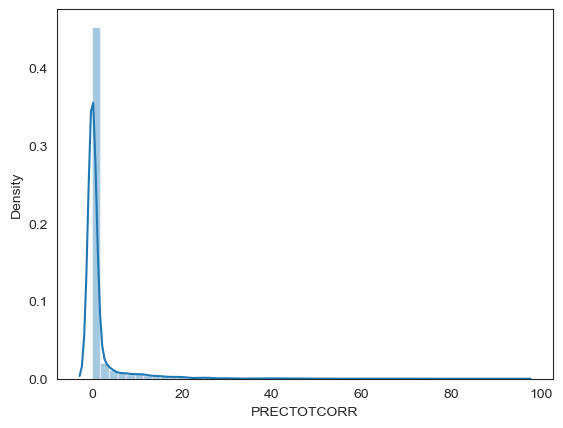

In [8]:
sns.set_style("white")
sns.distplot(AllData['PRECTOTCORR'])

(0.0, 0.01)

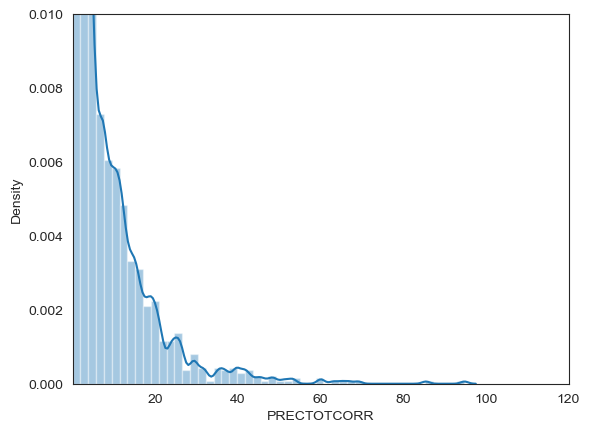

In [9]:
sns.distplot(AllData['PRECTOTCORR'])
plt.xlim(0.0001, 120)
plt.ylim(0,0.01)

In [10]:
print("Skewness: %f" % AllData['PRECTOTCORR'].skew())
print("Kurtosis: %f" % AllData['PRECTOTCORR'].kurt())

Skewness: 6.170723
Kurtosis: 54.506118


(0.0001, 100.0)

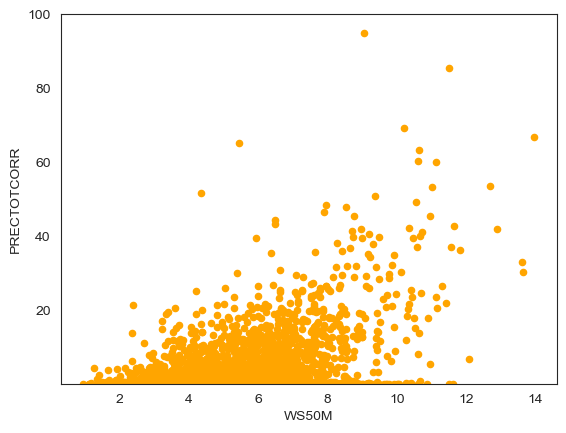

In [11]:
isvar = 'WS50M'
data = pd.concat([AllData['PRECTOTCORR'], AllData[isvar]], axis=1)
data.plot.scatter(x=isvar, y='PRECTOTCORR',c='orange');
plt.ylim(0.0001,100)

<AxesSubplot:>

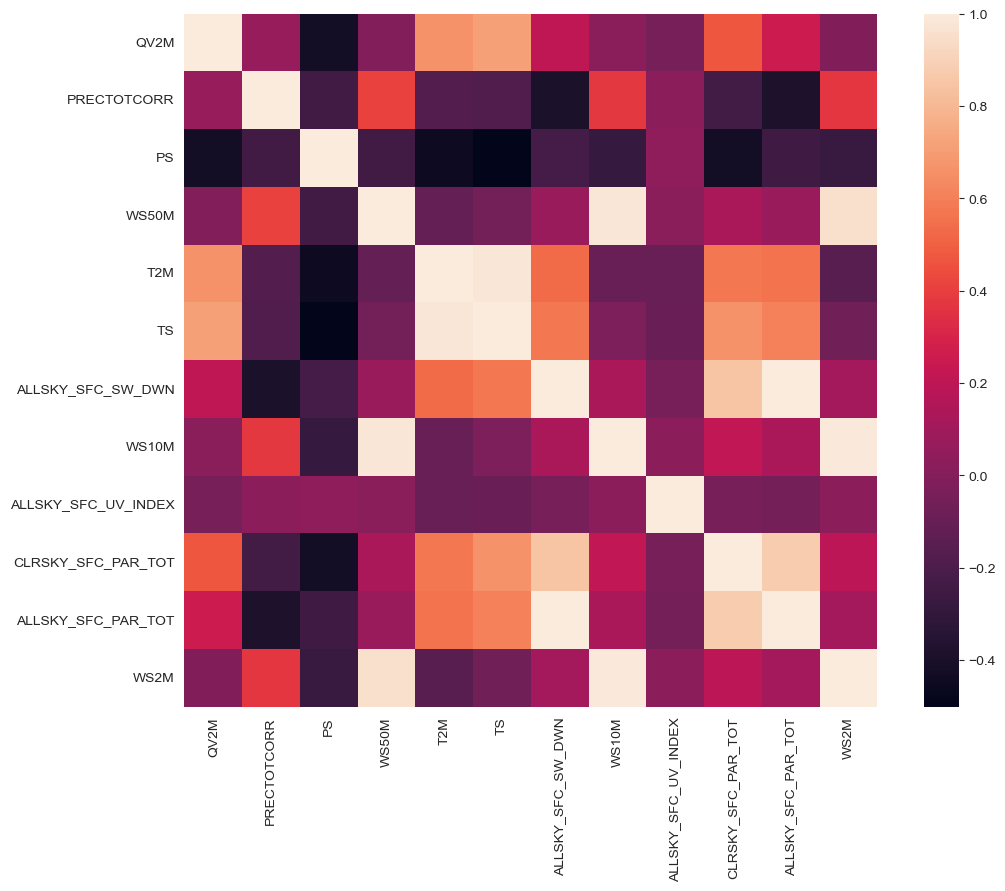

In [12]:
corrmatrix = AllData.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, square=True)

In [13]:
print("Shape of all the data: {}" .format(AllData.shape))
testall=AllData['PRECTOTCORR']
trainall=AllData.drop('PRECTOTCORR',axis=1)

print("Shape of the predictand (precipitation): {}".format(testall.shape))
print("Shape of the training data: {}".format(trainall.shape))

Shape of all the data: (7305, 12)
Shape of the predictand (precipitation): (7305,)
Shape of the training data: (7305, 11)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression 

In [15]:
regr = RandomForestRegressor(n_estimators=1000,max_depth=100, random_state=0)
mdl=regr.fit(trainall,testall)

In [16]:
ytest=mdl.predict(trainall)
cc=np.corrcoef(testall,ytest)

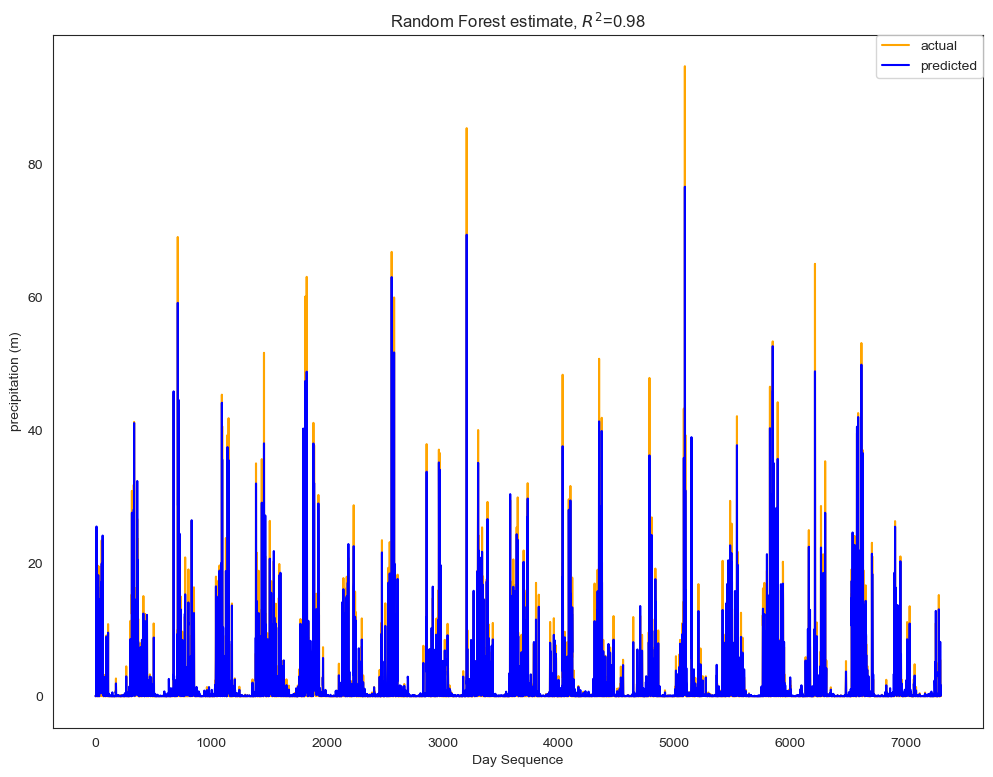

In [17]:
fig = plt.figure(figsize=(12, 9))
plt.plot(testall, label="actual", c='orange') 
plt.plot(ytest,label="predicted", c='blue')
plt.xlabel('Day Sequence')
plt.ylabel('precipitation (m)')
plt.title('Random Forest estimate, $R^2$=' "%.2f" %  cc[0,1])
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.show()

In [18]:
print('The correlation coefficent between the actual and predicted values is {}'.format(cc[0,1]))

The correlation coefficent between the actual and predicted values is 0.9824003860373012


In [19]:
x_train, x_test, y_train, y_test = train_test_split(trainall, testall, random_state=0)
print("Shape of the training data: {}".format(x_train.shape))
print("Shape of the validation data: {}".format(x_test.shape))
print("Shape of the validation data: {}".format(y_train.shape))
print("Shape of the validation data: {}".format(y_test.shape))

Shape of the training data: (5478, 11)
Shape of the validation data: (1827, 11)
Shape of the validation data: (5478,)
Shape of the validation data: (1827,)


In [20]:
mdl=regr.fit(x_train,y_train)
x_predict=mdl.predict(x_train)

cc_train=np.corrcoef(x_predict,y_train)

y_predict=mdl.predict(x_test)
cc_valid=np.corrcoef(y_predict,y_test)

print('The correlation coefficent between the actual and predicted values for the training data  is {}'.format(cc_train[0,1]))
print('The correlation coefficent between the actual and predicted values for the indipendent validation  is {}'.format(cc_valid[0,1]))

The correlation coefficent between the actual and predicted values for the training data  is 0.982304942774186
The correlation coefficent between the actual and predicted values for the indipendent validation  is 0.8615245196567624


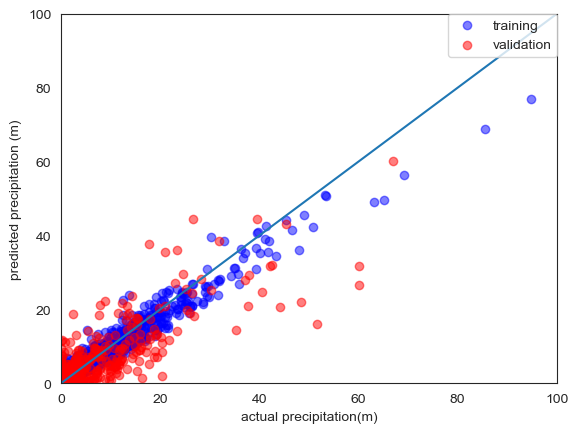

In [21]:
fig = plt.figure()
plt.plot([0, 100], [0,100]) # the  line passing through [0,0] and [1,1] 
plt.scatter(y_train, x_predict, c="b", alpha=0.5,label='training')
plt.scatter(y_test, y_predict, c="r", alpha=0.5, label='validation')
plt.xlim( (0, 100) )
plt.ylim((0,100))
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.xlabel('actual precipitation(m)')
plt.ylabel('predicted precipitation (m)')
plt.show()

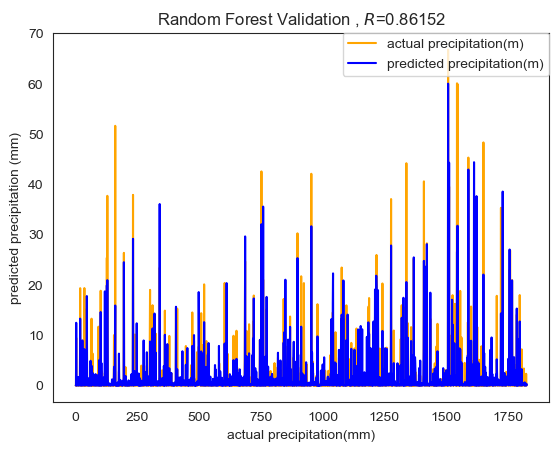

In [22]:
plt.figure
plt.plot(y_test.values,c='orange',label='actual precipitation(m)')
plt.plot(y_predict, c='blue', label="predicted precipitation(m)")
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title('Random Forest Validation , $R$=' "%.5f" %  cc_valid[0,1])
plt.xlabel('actual precipitation(mm)')
plt.ylabel('predicted precipitation (mm)')
plt.show()

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7415583845626059

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)

8.316608254929134

In [25]:
import math
RMSE = math.sqrt(8.316608254929134)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

2.8838530224214156


In [26]:

from sklearn.metrics import mean_absolute_error as mae


error = mae(y_test, y_predict)

print("Mean absolute error : " + str(error))

Mean absolute error : 1.0481560755336623


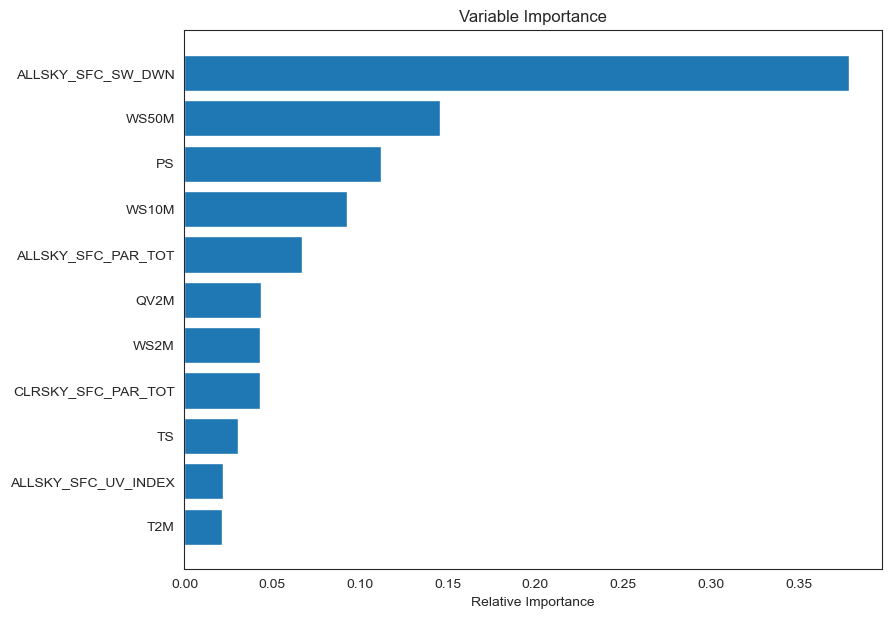

In [27]:
var_importance=mdl.feature_importances_
important_idx = np.where(var_importance > 0)
important_var = trainall.columns[important_idx]
sorted_idx = np.argsort(var_importance[important_idx])[::1]
var_importance=var_importance[important_idx]
sorted_var=important_var[sorted_idx]
sorted_var_importance=var_importance[sorted_idx]

pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(9, 7))
plt.barh(pos, sorted_var_importance, align='center')
plt.yticks(pos, sorted_var)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
#plt.draw()
plt.show()

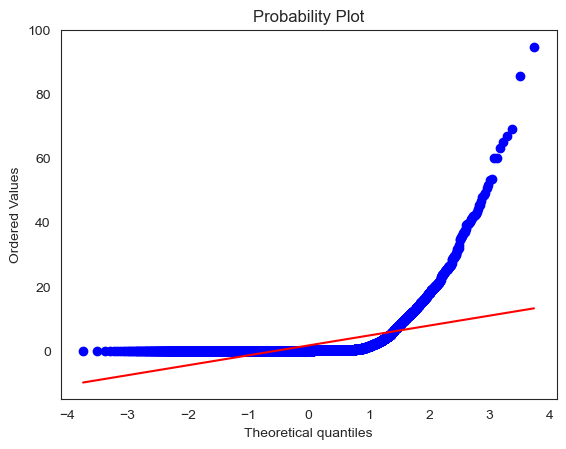

In [28]:
fig = plt.figure()
res = stats.probplot(AllData['PRECTOTCORR'], plot=plt)
plt.show()

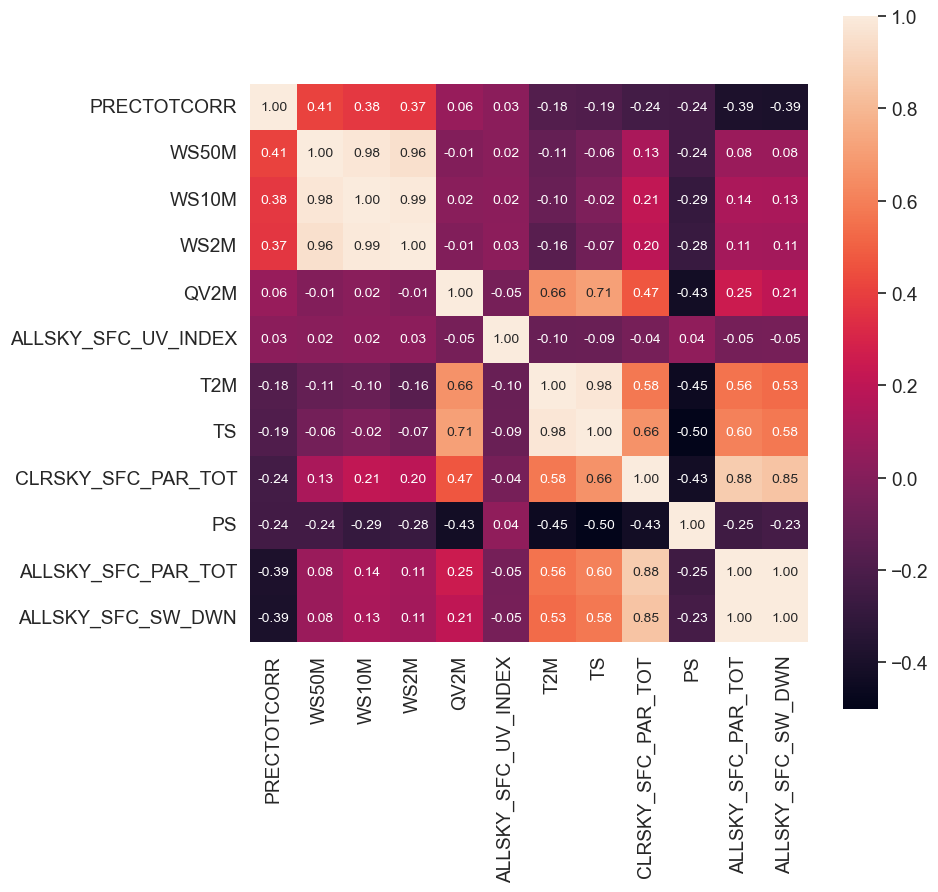

In [29]:
N = 12
cols = corrmatrix.nlargest(N, 'PRECTOTCORR')['PRECTOTCORR'].index
cm = np.corrcoef(AllData[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(9, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

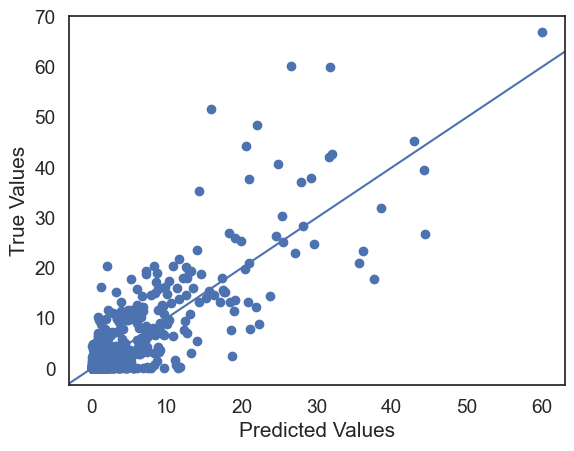

In [30]:
sns.set_style("white")
plt.scatter(y_predict, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_=plt.plot([-100,100],[-100,100])

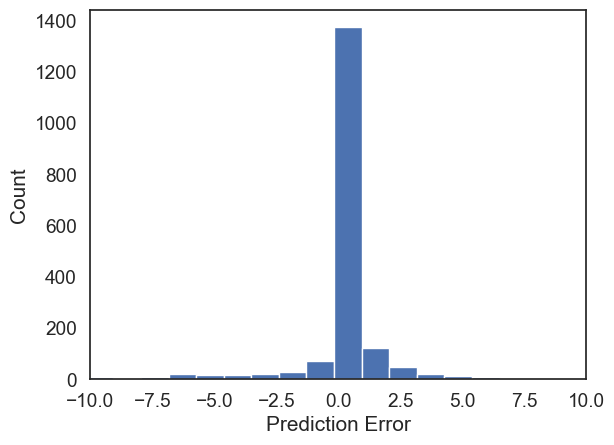

In [31]:
sns.set_style("white")
error = y_predict.reshape(1827,) - y_test
plt.xlim(-10,10)
plt.hist(error,bins = 50)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
_=plt.ylabel("Count")

In [32]:
var_importance

array([0.04385547, 0.11199289, 0.14554615, 0.02137051, 0.03059932,
       0.37866729, 0.09247318, 0.02218711, 0.0428627 , 0.06726614,
       0.04317924])

In [33]:
AllDatanew=AllData.drop('PRECTOTCORR',axis=1)

In [34]:
# Get numerical feature importances
importances = list(regr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(AllDatanew.columns,importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: ALLSKY_SFC_SW_DWN    Importance: 0.38
Variable: WS50M                Importance: 0.15
Variable: PS                   Importance: 0.11
Variable: WS10M                Importance: 0.09
Variable: ALLSKY_SFC_PAR_TOT   Importance: 0.07
Variable: QV2M                 Importance: 0.04
Variable: CLRSKY_SFC_PAR_TOT   Importance: 0.04
Variable: WS2M                 Importance: 0.04
Variable: TS                   Importance: 0.03
Variable: T2M                  Importance: 0.02
Variable: ALLSKY_SFC_UV_INDEX  Importance: 0.02


[None, None, None, None, None, None, None, None, None, None, None]

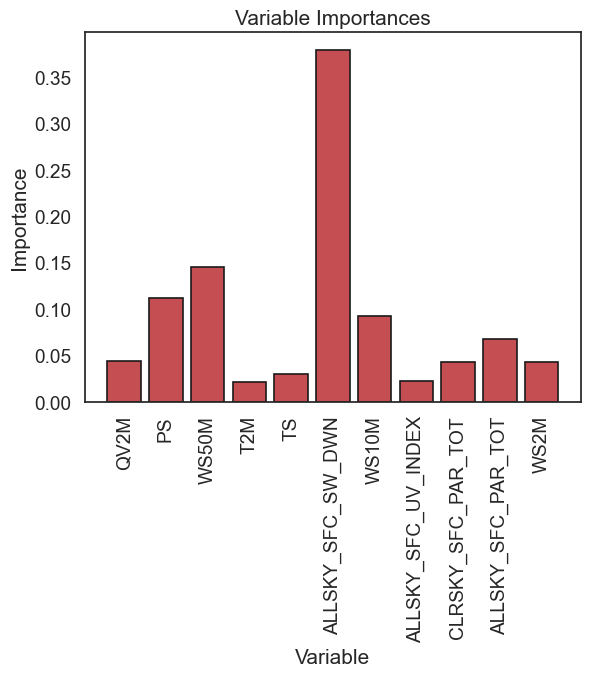

In [35]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, AllDatanew.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

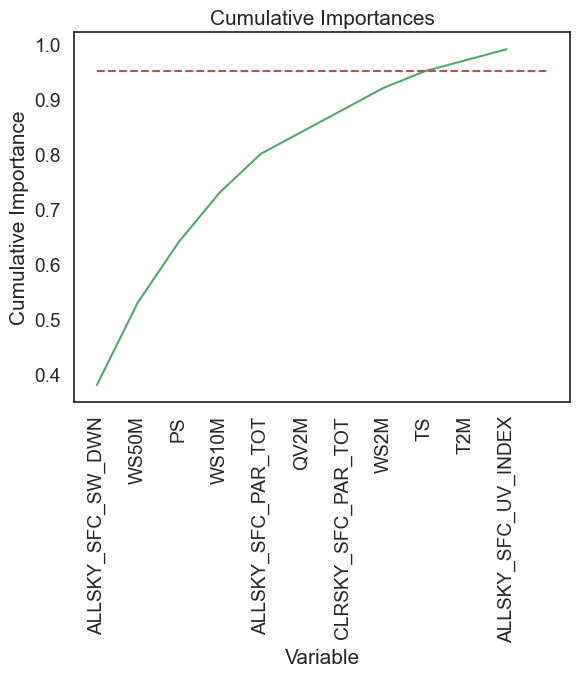

In [36]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [37]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 9


In [38]:
AllData=AllData.drop('T2M',axis=1)
AllData=AllData.drop('ALLSKY_SFC_UV_INDEX',axis=1)

trainnew=AllData.drop('PRECTOTCORR',axis=1)

AllData.shape

(7305, 10)

The correlation coefficent between the actual and predicted values for the training data  is 0.9821428808074445
The correlation coefficent between the actual and predicted values for the indipendent validation  is 0.8632833450035168


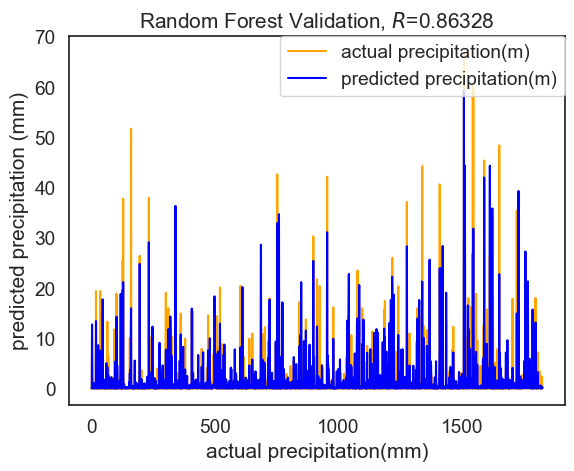

In [39]:

x_trainnew, x_testnew, y_trainnew, y_testnew = train_test_split(trainnew, testall, random_state=0)

mdl=regr.fit(x_trainnew,y_trainnew)
x_predictnew=mdl.predict(x_trainnew)

cc_trainnew=np.corrcoef(x_predictnew,y_trainnew)

#predict and test for the indipendent validation data
y_predictnew=mdl.predict(x_testnew)
cc_validnew=np.corrcoef(y_predictnew,y_testnew)

print('The correlation coefficent between the actual and predicted values for the training data  is {}'.format(cc_trainnew[0,1]))
print('The correlation coefficent between the actual and predicted values for the indipendent validation  is {}'.format(cc_validnew[0,1]))
      

#Ploting the indipendent validation 
plt.figure()
plt.plot(y_testnew.values,c='orange',label='actual precipitation(m)')
plt.plot(y_predictnew, c='blue', label="predicted precipitation(m)")
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title('Random Forest Validation, $R$=' "%.5f" %  cc_validnew[0,1])
plt.xlabel('actual precipitation(mm)')
plt.ylabel('predicted precipitation (mm)')
plt.show()

In [40]:
from sklearn.metrics import r2_score
r2_score(y_testnew,y_predictnew)

0.7443870641518515

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_testnew,y_predictnew)

8.225581815620377

In [42]:
import math
RMSE = math.sqrt(8.225581815620377)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

2.868027513051501


In [43]:
from sklearn.metrics import mean_absolute_error as mae


error = mae(y_testnew, y_predictnew)

print("Mean absolute error : " + str(error))

Mean absolute error : 1.0444897974822118
